# MNIST

# Load digits and plot examples

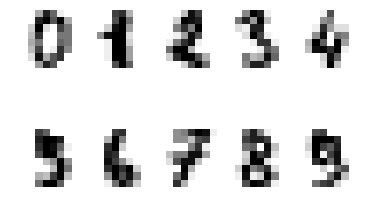

In [9]:
%matplotlib inline
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()
plt.set_cmap('gray_r')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i]) 
    plt.axis("off")
plt.show()

# K-nearest neighbor classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np
from random import shuffle

def predict_digits(digit1, digit2, k, n_splits=5):
    # Get data for digit1 and digit2
    data1 = [(x,0) for x, y in zip(digits.data, digits.target)
            if y == digit1]
    data2 = [(x,1) for x, y in zip(digits.data, digits.target)
            if y == digit2]

    # Combine and shuffle
    data = data1+data2
    shuffle(data)
    X, Y = zip(*data)
    X = np.array(X)
    Y = np.array(Y)

    # K-fold cross validation
    err_rate = []
    kf = KFold(n_splits=n_splits)
    for train_index, test_index in kf.split(X):
        train_X = X[train_index]
        train_Y = Y[train_index]
        test_X = X[test_index]
        test_Y = Y[test_index]

        # Fit model
        model = KNeighborsClassifier(k)
        model.fit(train_X, train_Y)

        # Predict
        predicted = model.predict(test_X)
        err_rate.append(1 - np.count_nonzero(test_Y == predicted) 
                        / float(len(test_Y)))
    
    return np.mean(err_rate)


# Select the best K

In [15]:
n_trials = 1000
results = []
for n_splits in [2,5,10]:
    for k in range(1,20):
        errs = []
        for i in range(n_trials):
            digit1, digit2 = np.random.choice(range(10), 2, replace=False)
            errs.append(predict_digits(digit1, digit2, k, n_splits))
        results.append([n_splits, k, np.mean(errs)])

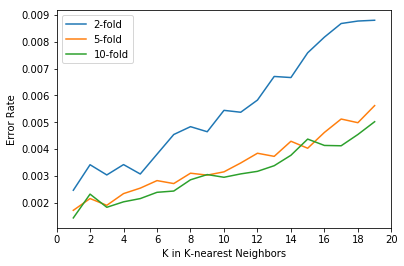

In [16]:
import pandas as pd
from matplotlib.ticker import MaxNLocator
results = pd.DataFrame(results, columns=["n_splits","k","err"])
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for n_splits, group in results.groupby("n_splits"):
    k_values = group["k"]
    err_values = group["err"]
    plt.plot(k_values,err_values, label="{}-fold".format(n_splits))
plt.legend()
plt.xlim(0,20)
plt.xlabel("K in K-nearest Neighbors")
plt.ylabel("Error Rate")
plt.show()

From the results above, we can see that K=1 seems to be the most optimal classifier.

To select the best K, the program iterated through each value of K from 1 to 19, and performed 1000 trials every time. In each trial, two random digits are selected without replacement, and cross validation was used in calculating error rates (the training and testing sets are therefore different in each trial). I also tried different number of folds in the cross validation, and although the baseline for error rate was slightly different, we see that the optimal choice of K is independent of the choice of cross validation method.

It is also interesting to observe a subtle pattern that an odd value of K performs better than an even value, at least when K is small. This is likely because an odd value of K eliminates the possibility of ties.


# Classify 3 and 9

In [27]:
print "Error rate={}".format(predict_digits(3, 9, 1, n_splits=2))

Error rate=0.011019367373
